# Proyecto Streamlit

In [8]:
# Importar librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Leer los datos

df = pd.read_csv('../data/raw/Crypto Data Since 2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [5]:
# Transformar columnas categóricas

df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3858 non-null   datetime64[ns]
 1   Bitcoin (USD)       3858 non-null   float64       
 2   Ethereum (USD)      3858 non-null   float64       
 3   Gold (USD per oz)   3858 non-null   float64       
 4   Cardano (ADA)       3858 non-null   float64       
 5   Binance Coin (BNB)  3858 non-null   float64       
 6   Ripple (XRP)        3858 non-null   float64       
 7   Dogecoin (DOGE)     3858 non-null   float64       
 8   Solana (SOL)        3858 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 271.4 KB


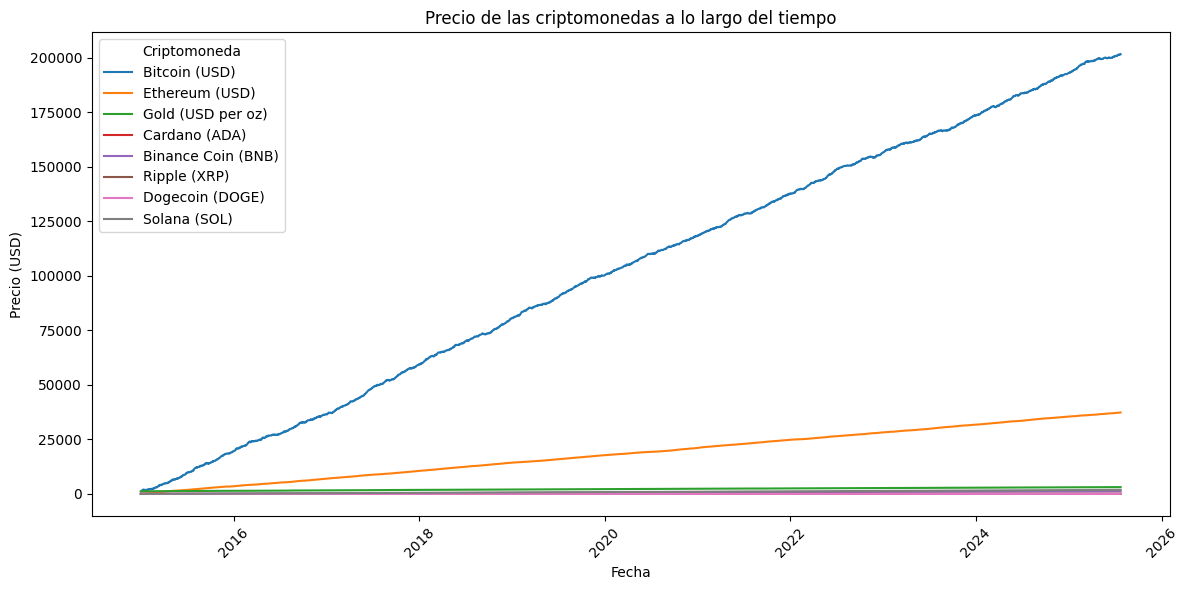

In [9]:
# Análisis exploratorio de datos (numéricas)

plt.figure(figsize=(12, 6))
for column in df.columns:
    if column not in ['Date']:
        sns.lineplot(data=df, x='Date', y=column, label=column)
plt.title('Precio de las criptomonedas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend(title='Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Encontrar máximo de Date

max_date = df['Date'].max()
print(f"La fecha más reciente en el conjunto de datos es: {max_date}")

La fecha más reciente en el conjunto de datos es: 2025-07-24 00:00:00


In [11]:
# Separar conjunto de datos en entrenamiento y prueba. Test serán últimos 6 meses

from datetime import timedelta

test_start_date = max_date - timedelta(days=180)
train_df = df[df['Date'] < test_start_date]
test_df = df[df['Date'] >= test_start_date]
print(f"Conjunto de entrenamiento: {train_df.shape[0]} filas")
print(f"Conjunto de prueba: {test_df.shape[0]} filas")

Conjunto de entrenamiento: 3677 filas
Conjunto de prueba: 181 filas


In [14]:
# Escalar columnas de precios

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_columns = df.columns.difference(['Date'])
train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
test_df[price_columns] = scaler.transform(test_df[price_columns])
train_df.head()




/tmp/ipykernel_4325/3844944947.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
/tmp/ipykernel_4325/3844944947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[price_columns] = scaler.transform(test_df[price_columns])


,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000178,0.000169
1,2015-01-02,0.000187,0.000226,0.001551,0.000465,0.000312,0.000350,0.001352,0.000000
2,2015-01-03,0.000781,0.000380,0.001497,0.000378,0.000051,0.000568,0.000617,0.000770
3,2015-01-04,0.001827,0.000440,0.000427,0.000932,0.000024,0.000941,0.000359,0.001253
4,2015-01-05,0.001964,0.000719,0.000512,0.001964,0.000251,0.000799,0.000000,0.001386


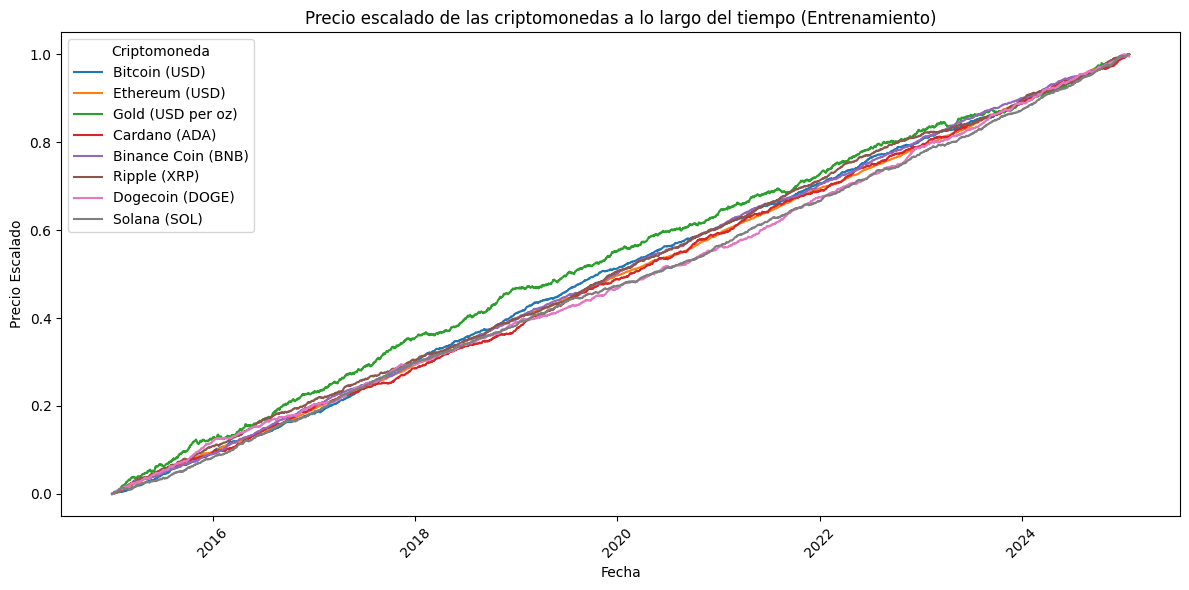

In [15]:
# graficar datos escalados

plt.figure(figsize=(12, 6))
for column in train_df.columns:
    if column not in ['Date']:
        sns.lineplot(data=train_df, x='Date', y=column, label=column)
plt.title('Precio escalado de las criptomonedas a lo largo del tiempo (Entrenamiento)')
plt.xlabel('Fecha')
plt.ylabel('Precio Escalado')
plt.legend(title='Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

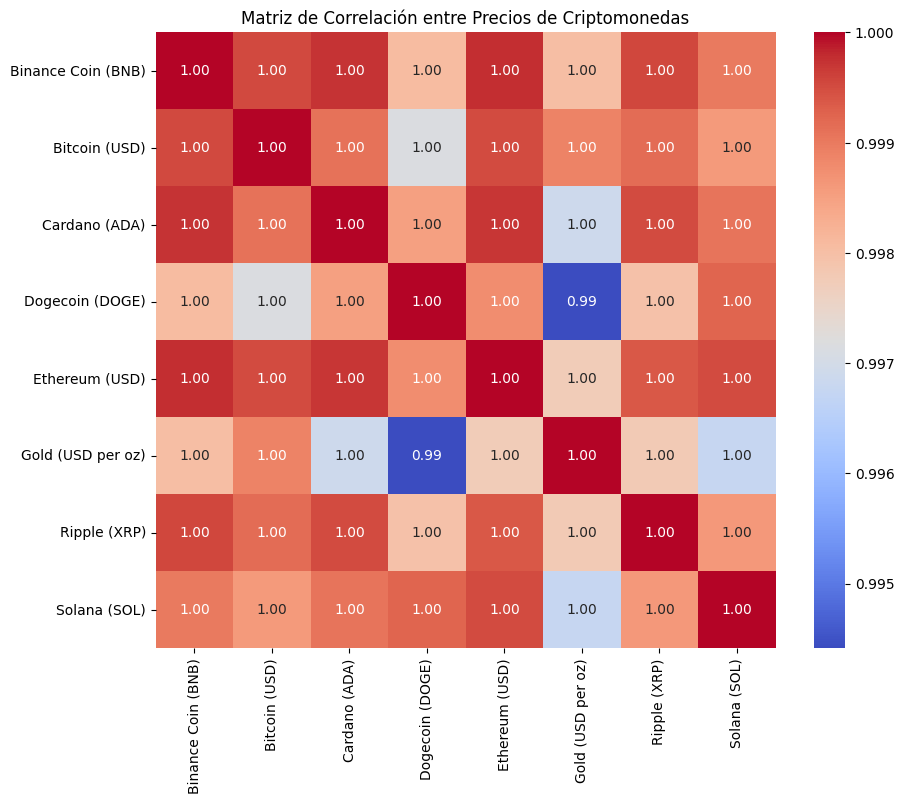

In [16]:
# Gráfico de correlación

plt.figure(figsize=(10, 8))
correlation_matrix = train_df[price_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación entre Precios de Criptomonedas')
plt.show()



In [18]:
# La variable a predecir será Ethereum (ETH). Vamos a usar otros precios desfasados 5 días como features

def create_features(df, target_column, lag=5):
    for i in range(1, lag + 1):
        df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
    return df
train_df = create_features(train_df, 'Ethereum (USD)', lag=5)
test_df = create_features(test_df, 'Ethereum (USD)', lag=5)

# Eliminar filas con NaN generados por el desfase
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.head()

/tmp/ipykernel_4325/1595387816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
/tmp/ipykernel_4325/1595387816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
/tmp/ipykernel_4325/1595387816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL),Ethereum (USD)_lag_1,Ethereum (USD)_lag_2,Ethereum (USD)_lag_3,Ethereum (USD)_lag_4,Ethereum (USD)_lag_5
5,2015-01-06,0.002102,0.000940,0.002345,0.001760,0.001308,0.000339,0.001174,0.001393,0.000719,0.000440,0.000380,0.000226,0.000000
6,2015-01-07,0.003177,0.001116,0.002796,0.001932,0.001615,0.000876,0.001114,0.002151,0.000940,0.000719,0.000440,0.000380,0.000226
7,2015-01-08,0.003833,0.001193,0.003081,0.002482,0.002603,0.000956,0.000610,0.002349,0.001116,0.000940,0.000719,0.000440,0.000380
8,2015-01-09,0.003849,0.001564,0.005130,0.002459,0.002962,0.001555,0.001168,0.002237,0.001193,0.001116,0.000940,0.000719,0.000440
9,2015-01-10,0.004388,0.002310,0.003847,0.003011,0.003055,0.001460,0.001869,0.002302,0.001564,0.001193,0.001116,0.000940,0.000719


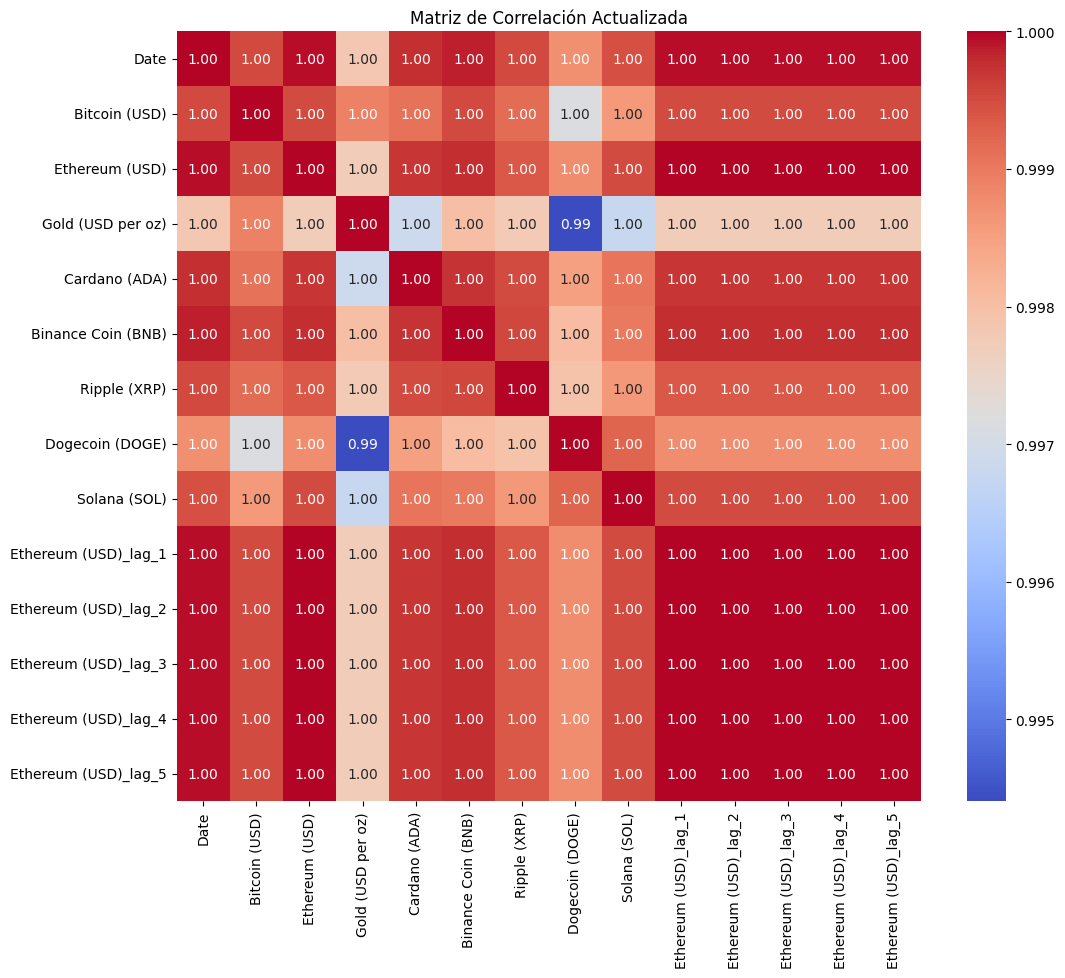

In [20]:
# Gráfico de correlación actualizado

plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación Actualizada')
plt.show() 

In [24]:
# Usar lag 5 de Ethereum (USD) para predecir Binance Coin (USD)

X_train = train_df[['Ethereum (USD)_lag_5']]
y_train = train_df['Binance Coin (BNB)']
X_test = test_df[['Ethereum (USD)_lag_5']]
y_test = test_df['Binance Coin (BNB)']



In [25]:
# Entrenar varios modelos de regresión para identificar el mejor

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=89),
    'Support Vector Regression': SVR()
}
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Mostrar resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False, inplace=True)
print(results_df)

                                MSE         R2
Linear Regression          0.000194   0.198497
Random Forest              0.000850  -2.506764
Support Vector Regression  0.016409 -66.664569


In [26]:
# Entrenar modelo de regresión lineal

best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression - MSE: {mse}, R2: {r2}")


Linear Regression - MSE: 0.00019436421189502001, R2: 0.19849671466992125


In [27]:
# Guardar modelo entrenado

from pickle import dump
dump(best_model, open('../models/best_model.pkl', 'wb'))

#Guardar el scaler utilizado

dump(scaler, open('../models/scaler.pkl', 'wb'))

CONCLUSIONES:

- En análisis exploratio es fundamental para entender los datos con los que se está trabajando, definir mejor cuál será la variable objetivo e identificar qué modelos se pueden ajustar mejor.
- Una vez identificado el tipo de modelo, es posible validar varias opciones con el objetivo de comparar y entrenar el mejor modelo acorde a métricas de evaluación
- Para facilitar el despliegue es importante guardar no solo el mejor modelo obtenido, sino también, el escalador utilizado para que al momento de recibir datos por parte del usuario, se pueda hacer el mismo tratamiento que en el entrenamiento.
- Streamlit permite desplegar un modelo de forma sencilla y generar una interfaz amigable al usuario para recibir los resultados.
